In [167]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [168]:
data = np.loadtxt('data.dat')
x = data[:,0]
ex = x*0 + 3*np.pi/180
en = data[:,1]
sen = data[:,2]/(2*np.sqrt(2*np.log(2)))
gross = data[:,3] 

datanew = np.loadtxt('newdata.dat')
xnew = datanew[:,0]
exnew = xnew*0 + 3*np.pi/180
ennew = datanew[:,1]
sennew = datanew[:,2]/(2*np.sqrt(2*np.log(2)))
grossnew = datanew[:,3] 

[2.96243551]
[0.19213752]
Ε =  3.0 +/- 0.2
Ποσοστιαία απόκλιση =  25.2 %
Σχετική απόκλιση =  5.0 σ
Σχετικό σφάλμα =  6.7 %


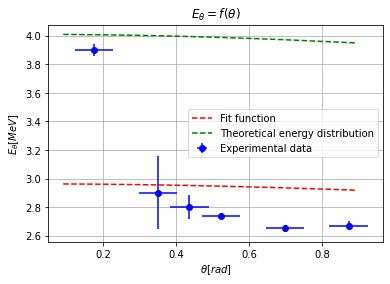

In [169]:
def energyfit (x, e0):
	a = 197/4
	return e0 * ((np.cos(x)+np.sqrt(a**2-np.sin(x)**2)) / (1+a))**2


popten, pcoven = curve_fit(energyfit, xnew, ennew)
print(popten)
print(np.sqrt(np.diag(pcoven)))

eexp = round(popten[0], 1)
esigma = round(np.sqrt(np.diag(pcoven))[0], 1)
etheor = 4.01
posost = np.abs(etheor-eexp)/etheor*100
sxetiki = np.abs(etheor-eexp)/esigma
sxetiko = esigma/eexp*100
print('Ε = ', eexp, '+/-', esigma)
print('Ποσοστιαία απόκλιση = ', round(posost,1), '%')
print('Σχετική απόκλιση = ', round(sxetiki, 1), 'σ')
print('Σχετικό σφάλμα = ', round(sxetiko, 1), '%')



plt.title(r'$E_\theta = f(\theta )$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$E_\theta [MeV]$')
plt.grid()
plt.xticks()
plt.yticks()
plt.errorbar(xnew, ennew, sennew, exnew, 'bo')
th = np.linspace(0.09, 0.89, 1000)
plt.plot(th, energyfit(th, *popten), 'r--')
plt.plot(th, energyfit(th, etheor), 'g--')
plt.legend(['Fit function', 'Theoretical energy distribution', 'Experimental data'])
#plt.show()
plt.savefig('energyfit.png', dpi=500)

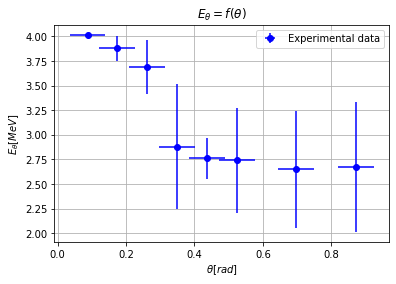

In [170]:
plt.title(r'$E_\theta = f(\theta )$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$E_\theta [MeV]$')
plt.grid()
plt.xticks()
plt.yticks()
plt.errorbar(x, en , sen, ex, 'bo')
plt.legend(['Experimental data'])
#plt.show()
plt.savefig('energydata.png', dpi=500)

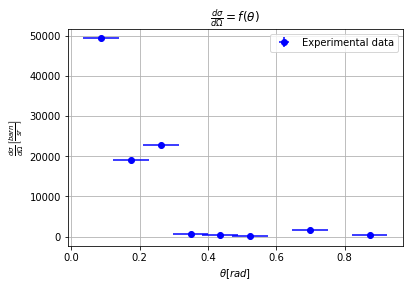

In [171]:
def theor_dsdw (x):
	z1 = 79
	z2 = 2
	esq = 1.44
	e = 5.49
	return z1**2 * z2**2 * esq**2 /(16*e**2 * np.sin(x/2)**4)*10**(-2)

plt.title(r'$\frac{d\sigma}{d\Omega} = f(\theta)$')
plt.ylabel(r'$\frac{d\sigma}{d\Omega} \left[\frac{barn}{sr}\right]$')
plt.xlabel(r'$\theta [rad]$')
plt.grid()
plt.xticks()
plt.yticks()
plt.errorbar(x, gross, ex*0, ex, 'bo')
plt.legend(['Experimental data'])
#plt.show()
plt.savefig('dsdwdata.png', dpi=500)

/tmp/ipykernel_340611/87745460.py:2: RuntimeWarning: overflow encountered in power
  return a* np.sin(x/2)**b


Ποσοστιαία απόκλιση α =  70.0 %
Σχετική απόκλιση α =  0.8 σ
Σχετικό σχάλμα α =  300.0 %
Ποσοστιαία απόκλιση β =  12.5 %
Σχετική απόκλιση β =  0.5 σ
Σχετικό σχάλμα β =  24.0 %


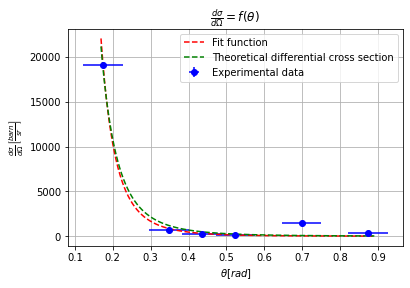

In [172]:
def crosssectionfit (x, a, b):
	return a* np.sin(x/2)**b


poptcros, pcovcros = curve_fit(crosssectionfit, xnew, grossnew, p0=(0.01, 4)) 
#print(poptcros)
#print(np.sqrt(np.diag(pcovcros)))




aexp = round(poptcros[0],1)
atheor = 1.0
powtheor = -4
asigma = round(np.sqrt(np.diag(pcovcros))[0], 1)
power = round(poptcros[1], 1)
powersigma = round(np.sqrt(np.diag(pcovcros))[1], 1)
posost1 = round(abs(atheor - aexp)/atheor*100, 1)
print('Ποσοστιαία απόκλιση α = ', posost1, '%')

sxetiki1 = abs(atheor-aexp)/asigma
print('Σχετική απόκλιση α = ', round(sxetiki1, 1), 'σ')

sxetiko1 = abs(asigma/aexp)*100
print('Σχετικό σχάλμα α = ', round(sxetiko1,0), '%')

print('================================')
powtheor=-4
posost1 = round(abs((powtheor - power)/powtheor*100), 1)
print('Ποσοστιαία απόκλιση β = ', posost1, '%')

sxetiki1 = abs((powtheor-power)/powersigma)
print('Σχετική απόκλιση β = ', round(sxetiki1, 1), 'σ')

sxetiko1 = abs(powersigma/power*100)
print('Σχετικό σχάλμα β = ', round(sxetiko1,0), '%')





thnew1 = np.linspace(0.169, 0.89, 1000)
plt.title(r'$\frac{d\sigma}{d\Omega} = f(\theta )$')
plt.ylabel(r'$\frac{d\sigma}{d\Omega} \left[\frac{barn}{sr}\right]$')
plt.xlabel(r'$\theta [rad]$')
plt.grid()
plt.xticks()
plt.yticks()
plt.errorbar(xnew, grossnew, exnew, exnew, 'bo')
plt.plot(thnew1, crosssectionfit(thnew1, *poptcros), 'r--')
plt.plot(thnew1, theor_dsdw(thnew1), 'g--')
plt.legend(['Fit function', 'Theoretical differential cross section', 'Experimental data'])
#plt.show()
plt.savefig('dsdwfit.png', dpi=500)